<a href="https://colab.research.google.com/github/HubZun/Colab_Notebooks_Nutrisee/blob/main/update/modelin_nutrisee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Library

instal dulu library nya

In [ ]:
# Install TensorFlow Decision Forests if you haven't installed it
!pip install tensorflow_decision_forests

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 90.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning

In [3]:
nutrition_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/openfoodfacts_cleaned.csv')
nutrition_df.head()

<ipython-input-3-c8ea6ea7d483>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/openfoodfacts_cleaned.csv')


,Unnamed: 0,product_name,generic_name,quantity,brands,categories_en,origins_en,countries_en,traces_en,additives_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,3,Skyr,NaN,480 g,Danone,"Dairies,Fermented foods,Fermented milk product...",NaN,France,NaN,NaN,...,10.0,0.09,0.036,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
1,4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,7.8,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,...,15.7,2.10,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,Blueberry Cobbler Coffee,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,...,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,0.2,2.04,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
nutrition_df.isna().sum()

,0
Unnamed: 0,0
product_name,0
generic_name,1870120
quantity,1344209
brands,838120
categories_en,931045
origins_en,1897307
countries_en,0
traces_en,1839690
additives_n,1255057


In [5]:
columns_to_drop = [
    'Unnamed: 0', 'generic_name', 'quantity', 'brands', 'categories_en', 'origins_en',
    'traces_en', 'additives_n', 'additives_en', 'food_groups_en', 'ecoscore_score',
    'ecoscore_grade', 'main_category_en', 'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g',
    'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
    'salt_100g', 'carbohydrates_100g', 'countries_en', 'fat_100g','nutrition-score-fr_100g'
]

nutrition_df = nutrition_df.drop(columns=columns_to_drop)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,NaN,10.0,0.036,NaN
1,Vitória crackers,NaN,375.0,3.08,15.0,NaN,7.8,0.560,NaN
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,NaN,15.7,0.840,NaN
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,NaN
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,NaN,0.2,0.816,NaN


In [6]:
nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
nutrition_df['fiber_100g'].fillna(0, inplace=True)
nutrition_df.head()

<ipython-input-6-12aa7822acf8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
<ipython-input-6-12aa7822acf8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,0.0,10.0,0.036,0.0
1,Vitória crackers,NaN,375.0,3.08,15.0,0.0,7.8,0.560,0.0
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,0.0,15.7,0.840,0.0
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,0.0
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,0.0,0.2,0.816,0.0


In [7]:
nutrition_df.duplicated().sum()

112655

In [8]:
nutrition_df = nutrition_df.drop_duplicates()
nutrition_df = nutrition_df.dropna()
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0


In [9]:
nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888


Convert 'nutriscore_score' to categorical

In [10]:
def assign_grade(score):
    if -15 <= score <= -1:
        return "A"
    elif 0 <= score <= 2:
        return "B"
    elif 3 <= score <= 10:
        return "C"
    elif 11 <= score <= 18:
        return "D"
    elif 19 <= score <= 40:
        return "E"
    else:
        return "Invalid Score"

In [11]:
nutrition_df['nutriscore_grade'] = nutrition_df['nutriscore_score'].apply(assign_grade)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj,nutriscore_grade
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488,A
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592,C
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888,A
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104,D
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888,A


In [12]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956387 entries, 0 to 1982823
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   product_name                                           956387 non-null  object 
 1   nutriscore_score                                       956387 non-null  float64
 2   energy-kcal_100g                                       956387 non-null  float64
 3   saturated-fat_100g                                     956387 non-null  float64
 4   sugars_100g                                            956387 non-null  float64
 5   fiber_100g                                             956387 non-null  float64
 6   proteins_100g                                          956387 non-null  float64
 7   sodium_100g                                            956387 non-null  float64
 8   fruits-vegetables-nuts-estimate-from-i

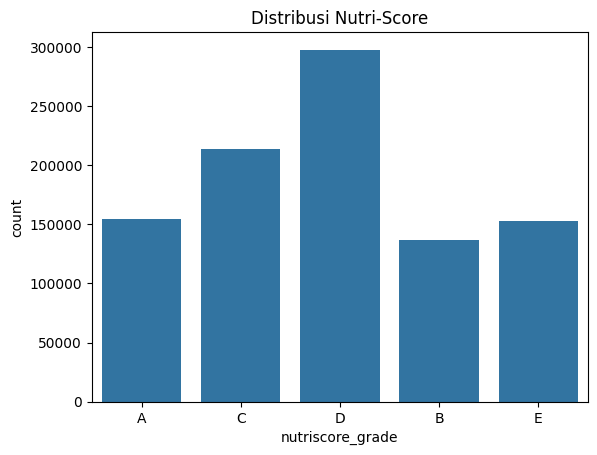

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi Nutri-Score
sns.countplot(x='nutriscore_grade', data=nutrition_df)
plt.title('Distribusi Nutri-Score')
plt.show()

In [14]:
# Features and target
X = nutrition_df[['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
        'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'energy_kj']]
y = nutrition_df['nutriscore_grade']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts categories (A, B, C, etc.) to integers

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build Neural Network Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [17]:
# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)


In [18]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Adjust input_dim to number of features

# Hidden layers
model.add(Dense(64, activation='relu'))  # You can adjust the number of neurons and layers

# Output layer (number of units = number of classes in nutriscore_grade)
model.add(Dense(y_train_one_hot.shape[1], activation='softmax'))  # Softmax for multi-class classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
# Train the model
history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val_one_hot),
                    epochs=5,  # You can adjust the number of epochs
                    batch_size=32)  # You can adjust the batch size


Epoch 1/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.5416 - loss: 1.0146 - val_accuracy: 0.5862 - val_loss: 0.9837
Epoch 2/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.6042 - loss: 0.9111 - val_accuracy: 0.6187 - val_loss: 0.9143
Epoch 3/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6205 - loss: 0.8836 - val_accuracy: 0.6277 - val_loss: 0.8886
Epoch 4/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.6279 - loss: 0.8727 - val_accuracy: 0.6357 - val_loss: 0.8642
Epoch 5/5
20921/20921 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - accuracy: 0.6347 - loss: 0.8569 - val_accuracy: 0.6369 - val_loss: 0.8608


# Set Data for Prediction

In [25]:
# Misalnya kita memiliki data baru yang ingin diprediksi dalam format yang sama seperti X_train
# Contoh data baru, harus memiliki kolom yang sama dengan X_train
# new_data = [[0.1, 3.9, 0.0, 10.0, 0.036, 0.0, 238.488]]  # Contoh data (saturated-fat_100g, sugars_100g, dll.)


new_data = pd.DataFrame({
    'saturated-fat_100g': [1.5, 0.1],
    'sugars_100g': [3.2, 3.9],
    'fiber_100g': [2.0, 0.0],
    'proteins_100g': [4.0, 10.0],
    'sodium_100g': [0.3, 0.036],
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [50, 0.0],
    'energy_kj': [500, 238.488]
})

# Normalisasi data baru menggunakan scaler yang sama
new_data_scaled = scaler.transform(new_data)

In [26]:
# Melakukan prediksi
predictions = model.predict(new_data_scaled)

# predictions adalah array 2D dengan probabilitas untuk setiap kelas
# Misalnya, jika ada 5 kelas, predictions[0] akan memberikan probabilitas untuk setiap kelas
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[3.29615176e-01 5.22723496e-01 1.29852653e-01 1.77610163e-02
  4.76172136e-05]
 [5.21204948e-01 1.22932814e-01 1.74707830e-01 1.81038246e-01
  1.16100666e-04]]


In [27]:
# Mengambil kelas dengan probabilitas tertinggi
predicted_class = tf.argmax(predictions, axis=1).numpy()  # Ambil indeks kelas dengan probabilitas tertinggi

# Jika Anda ingin melihat label kelas, ubah kembali hasil encoding
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f'Prediksi kelas untuk data baru: {predicted_label}')

Prediksi kelas untuk data baru: ['B' 'A']


# Build TF Decision Forest Model

In [30]:
import tensorflow_decision_forests as tfdf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Contoh penggunaan model GBDT dengan lebih banyak pohon, kedalaman lebih dalam, dan parameter lainnya
model = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.CLASSIFICATION,
    num_trees=100,           # Meningkatkan jumlah pohon
    max_depth=15,            # Meningkatkan kedalaman pohon
    min_examples=10,         # Membatasi jumlah contoh per daun
)

# Melatih model
model.fit(X_train, y_train)

# # Evaluasi model
# eval_result = model.evaluate(val_data)
# print(f"Validation Accuracy: {eval_result['accuracy']:.4f}")

Use /tmp/tmpcmz9tkdw as temporary training directory
Reading training dataset...


Training dataset read in 0:00:02.696038. Found 669470 examples.
Training model...
Model trained in 0:22:24.798890
Compiling model...


Model compiled.


In [31]:
val_predictions = model.predict(X_val)

val_predictions = [prediction.argmax() for prediction in val_predictions]

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate the model on the test data
test_predictions = model.predict(X_test)

# Convert probability predictions to class labels by taking the argmax
test_predictions = [prediction.argmax() for prediction in test_predictions]

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

4484/4484 [==============================] - 47s 10ms/step
Validation Accuracy: 0.8072
4484/4484 [==============================] - 44s 10ms/step
Test Accuracy: 0.8077


In [32]:
X_new = pd.DataFrame({
    'saturated-fat_100g': [1.5, 0.1],
    'sugars_100g': [3.2, 3.9],
    'fiber_100g': [2.0, 0.0],
    'proteins_100g': [4.0, 10.0],
    'sodium_100g': [0.3, 0.036],
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [50, 0.0],
    'energy_kj': [500, 238.488]
})

In [33]:
X_new_scaled = scaler.transform(X_new)  # Terapkan normalisasi pada data baru

In [34]:
predictions = model.predict(X_new_scaled)

# Ekstrak kelas yang diprediksi
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Convert back to original labels if necessary
predicted_labels = label_encoder.inverse_transform(predicted_classes)

# Tampilkan hasil prediksi
print(predicted_labels)

1/1 [==============================] - 0s 56ms/step
['B' 'A']


# Save Model

In [41]:
model.save("/saved_model/")